## 텐서플로 2.0 시작하기: 초보자용

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 44kB/s 
     |████████████████████████████████| 501kB 40.4MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 4.3MB 36.1MB/s 


[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비  
샘플 값을 정수에서 부동소수로 변환



In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만든다  
훈련에 사용할 옵티마이저(optimizer)와 손실 함수를 선택

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

모델을 훈련하고 평가

In [ ]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.2989 - accuracy: 0.9130
Epoch 2/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1435 - accuracy: 0.9570
Epoch 3/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1059 - accuracy: 0.9684
Epoch 4/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0854 - accuracy: 0.9735
Epoch 5/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0748 - accuracy: 0.9765
10000/1 - 0s - loss: 0.0435 - accuracy: 0.9762


[0.07268938641306012, 0.9762]

훈련된 이미지 분류기는 이 데이터셋에서 약 98%의 정확도를 달성

## 신경망 훈련 : 분류

운동화나 셔츠 같은 옷 이미지를 분류하는 신경망 모델 훈련

In [ ]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


패션 MNIST 데이터셋 사용
10개의 카테고리와 7만개의 흑백 이미지
개별 옷 품목을 나타냄

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


train : 60000개
test : 10000개

load_data() :  NumPy 배열 반환  
train : train_images, train_labels  
teat : test_images, test_labels  
label class : T-shrit, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot  

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 탐색

In [ ]:
train_images.shape  # 훈련세트 이미지 개수, 각 이미지 픽셀 28*28

(60000, 28, 28)

In [ ]:
len(train_labels) # 훈련 레이블 개수

60000

In [ ]:
train_labels  # 레이블은 0~9사이의 정수

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

### 데이터 전처리
네트워크 훈련 전 전처리 필요  
픽셀 값 범위 0~255  
-> 0~1 로 조정

train, test 동일하게 전처리

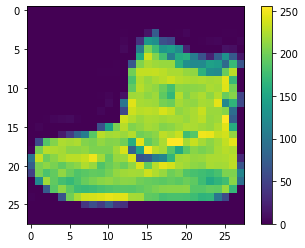

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# 범위 바꾸기 위해 255로 나눔
train_images = train_images / 255.0

test_images = test_images / 255.0

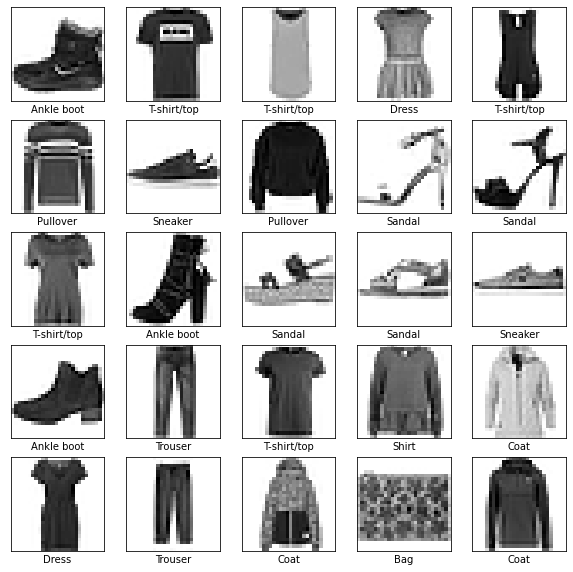

In [ ]:
# 처음 25개  이미지와 클래스 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### 모델 구성
모델 층 구성 > 모델 컴파일

#### 층 설정
신경망 기본 구성 요소 layer  
layer 는 주입된 데이터에서 표현을 추출함  
딥러닝은 간단한 층을 연결하여 구성함  
<kf.keras.layers.Dense> 훈련을 통해 가중치 학습  

In [ ]:
model = keras.Sequential([
    # 2차원 배열(28*28)의 이미지 포맷을 28*28=784픽셀의 1차원 배열로 변환
    keras.layers.Flatten(input_shape=(28, 28)), 
    # 픽셀을 펼치면 두개의 dense층이 연속되어 연결 (fully-connected)
    # 첫 번째 dense층은 128개의 노드
    # 두 번째 cmddms 10개 노드의 softmax layer :  10개의 확률을 반환(합이 1)
    # 각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### 모델 컴파일
* 손실 함수(Loss function)-훈련 하는 동안 모델의 오차를 측정  
모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화  
* 옵티마이저(Optimizer)-데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정  
* 지표(Metrics)-훈련 단계와 테스트 단계를 모니터링하기 위해 사용  
다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 모델 훈련

1. 훈련 데이터 모델에 주입 (train_images, train_labels)
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. test set에 대한 모델의 예측 - test images
4. 예측이 test_labels 배열의 레이블과 맞는지 확인

In [ ]:
model.fit(train_images, train_labels, epochs=5)  # 모델이 훈련 데이터 학습

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4996 - accuracy: 0.8238
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3764 - accuracy: 0.8638
Epoch 3/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3344 - accuracy: 0.8785
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3130 - accuracy: 0.8850
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2947 - accuracy: 0.8911


정확도 약 88%

### 정확도 평가
test set에서 모델의 성능 비교

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/1 - 0s - loss: 0.3043 - accuracy: 0.8708

테스트 정확도: 0.8708


test set 정확도가 train 보다 낮은 이유는 overfitting 때문  

### 예측 만들기
train된 모델을 사용해 이미지에 대한 예측 생성

In [ ]:
predictions = model.predict(test_images)
predictions[0]

array([4.5761692e-05, 7.8881038e-07, 7.9061829e-06, 4.6955225e-07,
       5.3296599e-06, 1.4095712e-01, 5.3744665e-05, 7.7862754e-02,
       2.1899818e-05, 7.8104424e-01], dtype=float32)

예측은 10개의 숫자 배열로 나타남  
10개의 옷 품목에 상응하는 모델의 신뢰도 (confidence)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_labels[0]

9

예측 label과 test label이 일치함

In [ ]:
# 10개 클래스에 대한 예측 모두 그래프로 표현
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

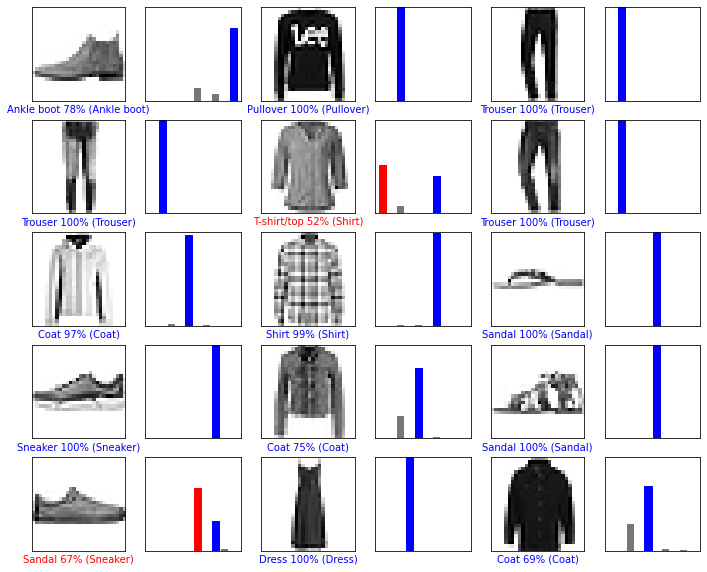

In [ ]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [ ]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# 이미지의 예측 만들기
predictions_single = model.predict(img)

print(predictions_single)

[[4.5761735e-05 7.8880743e-07 7.9061683e-06 4.6955273e-07 5.3296499e-06
  1.4095703e-01 5.3744669e-05 7.7862762e-02 2.1899819e-05 7.8104430e-01]]


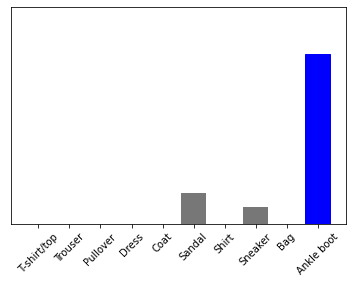

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9

## CSV 데이터 로드

`tf.data.Dataset` 으로 CSV 데어터 로드  

titanic 승객 목록을 기반으로 승객의 생존 가능성 예측

### 설정

In [ ]:
import functools

import numpy as np
import tensorflow as tf

TRAIN_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/train.csv"
TEST_DATA_URL = "https://storage.googleapis.com/tf-datasets/titanic/eval.csv"

train_file_path = tf.keras.utils.get_file("train.csv", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("eval.csv", TEST_DATA_URL)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

16384/13049 [=====================================] - 0s 0us/step


### 데이터 로드

In [ ]:
LABEL_COLUMN = 'survived'
LABELS = [0, 1]

전체 파일에서 csv 데이터를 읽고 데이터 셋 작성  
데이터셋의 각 항목은 배치이면 (많은 예제, 많은 레이블)의 튜플로 표현  
열 기반 tensor로 구성  

In [ ]:
def get_dataset(file_path, **kwargs):
  dataset = tf.data.experimental.make_csv_dataset(
      file_path,
      batch_size=5, # Artificially small to make examples easier to show.
      label_name=LABEL_COLUMN,
      na_value="?",
      num_epochs=1,
      ignore_errors=True, 
      **kwargs)
  return dataset

raw_train_data = get_dataset(train_file_path)
raw_test_data = get_dataset(test_file_path)


In [ ]:
def show_batch(dataset):
  for batch, label in dataset.take(1):
    for key, value in batch.items():
      print("{:20s}: {}".format(key,value.numpy()))

In [ ]:
show_batch(raw_train_data)

sex                 : [b'female' b'male' b'male' b'male' b'male']
age                 : [16. 28. 25. 22. 28.]
n_siblings_spouses  : [0 0 1 0 0]
parch               : [0 0 0 0 0]
fare                : [ 7.75  15.5    7.775  9.35   7.225]
class               : [b'Third' b'Third' b'Third' b'Third' b'Third']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Queenstown' b'Queenstown' b'Southampton' b'Southampton' b'Cherbourg']
alone               : [b'y' b'y' b'n' b'y' b'y']


csv 의 열 이름이 지정됨

### 데이터 전처리

csv 파일은 다양한 데이터 유형 포함 > 벡터로 변환  
데이터를 전처리 하고 처리된 출력을 tensorflow 에 전달  

#### 연속데이터
데이터가 숫자형식인 경우 데이터를 모델로 전달하기 전에 벡터로 묶는다

In [ ]:
SELECT_COLUMNS = ['survived', 'age', 'n_siblings_spouses', 'parch', 'fare']
DEFAULTS = [0, 0.0, 0.0, 0.0, 0.0]
temp_dataset = get_dataset(train_file_path, 
                           select_columns=SELECT_COLUMNS,
                           column_defaults = DEFAULTS)

show_batch(temp_dataset)

age                 : [35. 28. 30. 11. 36.]
n_siblings_spouses  : [1. 0. 0. 0. 0.]
parch               : [1. 0. 0. 0. 0.]
fare                : [ 20.25    7.829 106.425  18.788  10.5  ]


In [ ]:
example_batch, labels_batch = next(iter(temp_dataset))

In [ ]:
# 모든 열을 묶는 함수
def pack(features, label):
  return tf.stack(list(features.values()), axis=-1), label

In [ ]:
# pack()을 dataset 요소에 적용
packed_dataset = temp_dataset.map(pack)

for features, labels in packed_dataset.take(1):
  print(features.numpy())
  print()
  print(labels.numpy())

[[20.     0.     0.     9.846]
 [29.     1.     0.    66.6  ]
 [28.     0.     0.    29.7  ]
 [18.     1.     0.    17.8  ]
 [35.     0.     0.     7.125]]

[0 0 1 0 0]


In [ ]:
# 혼합 데이터 유형이 있는 경우 혼합 데이터셋으로 다시 전환
show_batch(raw_train_data)

sex                 : [b'male' b'female' b'male' b'male' b'male']
age                 : [25. 63. 35. 20. 19.]
n_siblings_spouses  : [1 0 0 0 0]
parch               : [0 0 0 0 0]
fare                : [91.079  9.587 26.     7.854  8.158]
class               : [b'First' b'Third' b'Second' b'Third' b'Third']
deck                : [b'B' b'unknown' b'unknown' b'unknown' b'unknown']
embark_town         : [b'Cherbourg' b'Southampton' b'Southampton' b'Southampton' b'Southampton']
alone               : [b'n' b'y' b'y' b'y' b'y']


In [ ]:
example_batch, labels_batch = next(iter(temp_dataset))

In [ ]:
# 일반적인 전처리기
class PackNumericFeatures(object):
  def __init__(self, names):
    self.names = names

  def __call__(self, features, labels):
    numeric_features = [features.pop(name) for name in self.names]
    numeric_features = [tf.cast(feat, tf.float32) for feat in numeric_features]
    numeric_features = tf.stack(numeric_features, axis=-1)
    features['numeric'] = numeric_features

    return features, labels

In [ ]:
NUMERIC_FEATURES = ['age','n_siblings_spouses','parch', 'fare']

packed_train_data = raw_train_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

packed_test_data = raw_test_data.map(
    PackNumericFeatures(NUMERIC_FEATURES))

In [ ]:
show_batch(packed_train_data)

sex                 : [b'female' b'male' b'male' b'male' b'female']
class               : [b'Third' b'Third' b'First' b'First' b'Third']
deck                : [b'unknown' b'unknown' b'B' b'C' b'unknown']
embark_town         : [b'Southampton' b'Queenstown' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'y' b'y' b'n' b'y' b'y']
numeric             : [[ 18.      0.      0.      9.842]
 [ 28.      0.      0.      8.458]
 [ 36.      0.      1.    512.329]
 [ 47.      0.      0.     52.   ]
 [ 26.      0.      0.      7.925]]


In [ ]:
example_batch, labels_batch = next(iter(packed_train_data))

##### 데이터 정규화

In [ ]:
import pandas as pd
desc = pd.read_csv(train_file_path)[NUMERIC_FEATURES].describe()
desc

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
MEAN = np.array(desc.T['mean'])
STD = np.array(desc.T['std'])

In [ ]:
def normalize_numeric_data(data, mean, std):
  # Center the data
  return (data-mean)/std

In [ ]:
# mean / std를 노멀라이저 fn에 바인딩
normalizer = functools.partial(normalize_numeric_data, mean=MEAN, std=STD)

numeric_column = tf.feature_column.numeric_column('numeric', normalizer_fn=normalizer, shape=[len(NUMERIC_FEATURES)])
numeric_columns = [numeric_column]
numeric_column

NumericColumn(key='numeric', shape=(4,), default_value=None, dtype=tf.float32, normalizer_fn=functools.partial(<function normalize_numeric_data at 0x7efbc39407a0>, mean=array([29.631,  0.545,  0.38 , 34.385]), std=array([12.512,  1.151,  0.793, 54.598])))

In [ ]:
# 이 특성 열을 포함해 숫자데이터 블록 선택, 중앙에 배치
example_batch['numeric']

<tf.Tensor: id=60932, shape=(5, 4), dtype=float32, numpy=
array([[23.   ,  0.   ,  0.   ,  7.55 ],
       [36.   ,  0.   ,  0.   , 26.388],
       [35.   ,  0.   ,  0.   , 10.5  ],
       [37.   ,  0.   ,  1.   , 29.7  ],
       [70.   ,  1.   ,  1.   , 71.   ]], dtype=float32)>

In [ ]:
numeric_layer = tf.keras.layers.DenseFeatures(numeric_columns)
numeric_layer(example_batch).numpy()

array([[-0.53 , -0.474, -0.479, -0.492],
       [ 0.509, -0.474, -0.479, -0.146],
       [ 0.429, -0.474, -0.479, -0.437],
       [ 0.589, -0.474,  0.782, -0.086],
       [ 3.226,  0.395,  0.782,  0.671]], dtype=float32)

#### 범주형데이터
범주형 열 > 콘텐츠는 제한된 옵션 set중 하나

In [ ]:
CATEGORIES = {
    'sex': ['male', 'female'],
    'class' : ['First', 'Second', 'Third'],
    'deck' : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'embark_town' : ['Cherbourg', 'Southhampton', 'Queenstown'],
    'alone' : ['y', 'n']
}

In [ ]:
categorical_columns = []
for feature, vocab in CATEGORIES.items():
  cat_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=feature, vocabulary_list=vocab)
  categorical_columns.append(tf.feature_column.indicator_column(cat_col))


In [ ]:
# See what you just created.
categorical_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='class', vocabulary_list=('First', 'Second', 'Third'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='deck', vocabulary_list=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Cherbourg', 'Southhampton', 'Queenstown'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='alone', vocabulary_list=('y', 'n'), dtype=tf.string, default_value=-1, num_oov_buckets=0))]

In [ ]:
categorical_layer = tf.keras.layers.DenseFeatures(categorical_columns)
print(categorical_layer(example_batch).numpy()[0])

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


#### 결합된 전처리 레이어
두개의 특성 열 모음 추가, 두 입력 유형을 추출하고 전처리 할 입력 레이어 만들기

In [ ]:
preprocessing_layer = tf.keras.layers.DenseFeatures(categorical_columns+numeric_columns)

In [ ]:
print(preprocessing_layer(example_batch).numpy()[0])

[ 1.     0.     0.     0.     1.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.    -0.53  -0.474
 -0.479 -0.492  0.     1.   ]


### 모델 빌드하기

In [ ]:
model = tf.keras.Sequential([
  preprocessing_layer,
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1),
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy'])

### 훈련, 평가, 예측
모델을 인스턴스화하고, 훈련

In [ ]:
train_data = packed_train_data.shuffle(500)
test_data = packed_test_data

In [ ]:
model.fit(train_data, epochs=20)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
126/126 [==============================] - 2s 14ms/step - loss: 0.5299 - accuracy: 0.7081
Epoch 2/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8086
Epoch 3/20
126/126 [==============================] - 0s 3ms/step - loss: 0.4081 - accuracy: 0.8293
Epoch 4/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8357
Epoch 5/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3788 - accuracy: 0.8421
Epoch 6/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3720 - accuracy: 0.8453
Epoch 7/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8357
Epoch 8/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3622 - accuracy: 0.8453
Epoch 9/20
126/126 [==============================] - 0s 3ms/step - loss: 0.3615 - accuracy: 0.8453
Epoch

In [ ]:
# 정확성 확인
test_loss, test_accuracy = model.evaluate(test_data)

print('\n\nTest Loss {}, Test Accuracy {}'.format(test_loss, test_accuracy))

53/53 [==============================] - 1s 10ms/step - loss: 0.4411 - accuracy: 0.8409


Test Loss 0.44105182025792466, Test Accuracy 0.8409090638160706


In [ ]:
# 배치에서 레이블 유추
predictions = model.predict(test_data)

# Show some results
for prediction, survived in zip(predictions[:10], list(test_data)[0][1][:10]):
  prediction = tf.sigmoid(prediction).numpy()
  print("Predicted survival: {:.2%}".format(prediction[0]),
        " | Actual outcome: ",
        ("SURVIVED" if bool(survived) else "DIED"))

Predicted survival: 99.48%  | Actual outcome:  SURVIVED
Predicted survival: 5.94%  | Actual outcome:  DIED
Predicted survival: 84.40%  | Actual outcome:  DIED
Predicted survival: 1.43%  | Actual outcome:  DIED
Predicted survival: 17.28%  | Actual outcome:  DIED
